We read the input signal file:

In [1]:
file_path = "input.txt"
file = open(file_path, "r")
lines = file.readlines()
file.close()
input_signal = [float(line) for line in lines]

We attempt to plot the signal

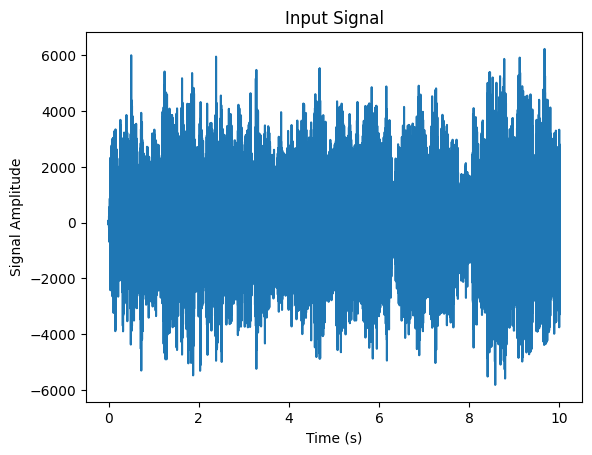

In [2]:
import matplotlib.pyplot as plt

sampling_rate = 480e3
duration = len(input_signal) / sampling_rate
time = [t / sampling_rate for t in range(len(input_signal))]

fig, ax = plt.subplots()
ax.plot(time, input_signal)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal Amplitude')
ax.set_title('Input Signal')

plt.show()

We show the fourier transfrom of the signal:

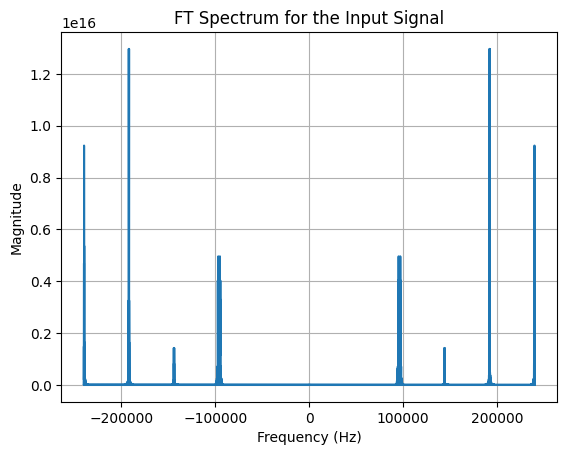

In [3]:
import numpy as np
from scipy.fft import fft, ifft

fft_signal = fft(input_signal)

freq = np.fft.fftfreq(len(input_signal), d = 1/sampling_rate)

plt.plot(freq, fft_signal.real ** 2 + fft_signal.imag ** 2)
plt.title('FT Spectrum for the Input Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

Now we have to implement a band-pass filter. Our low_cut is -10000 of FM and the high_cut is +10000 of the FM frequency

/tmp/ipykernel_1523463/736967399.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_signal[left_side:right_side] = fft_signal[left_side:right_side]
/tmp/ipykernel_1523463/736967399.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_signal[(input_length - right_side):(input_length - left_side)] = fft_signal[(input_length - right_side):(input_length - left_side)]


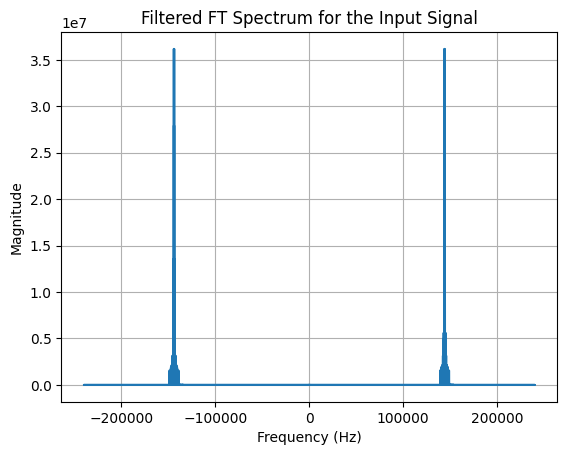

In [4]:
Fc = 144e3 # THIS IS THE RADIO STATION FM FREQUENCY. AVA = 96Khz, Goftogoo = 288KHz, Eghtesad = 144Khz, Farhang = 240Khz
input_length = len(input_signal)
filtered_signal = np.zeros((input_length,))
left_side = int((Fc - 10000)*input_length/sampling_rate)
right_side = int((Fc + 10000)*input_length/sampling_rate)
filtered_signal[left_side:right_side] = fft_signal[left_side:right_side]
filtered_signal[(input_length - right_side):(input_length - left_side)] = fft_signal[(input_length - right_side):(input_length - left_side)]


freq = np.fft.fftfreq(len(filtered_signal), d = 1/sampling_rate)

plt.plot(freq, np.abs(filtered_signal))
plt.title('Filtered FT Spectrum for the Input Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

Now we will attempt to build the carrier signal for our FM frequency

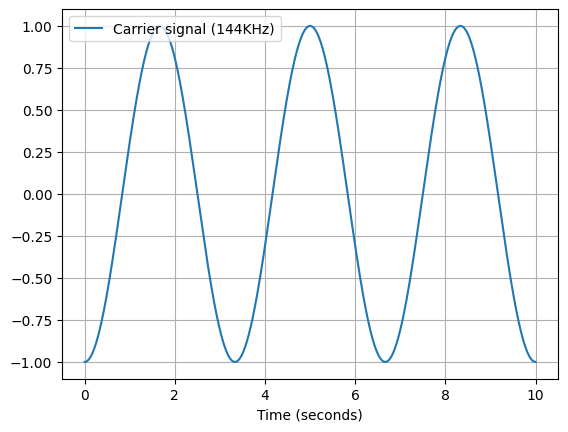

In [5]:
#Creating the Carrier Signal
carrier_frequency = Fc
input_length = len(input_signal)
time = np.arange(input_length) / sampling_rate
carrier_signal = -np.cos(2 * np.pi * (carrier_frequency / sampling_rate) * time)
signal_time = [t / sampling_rate for t in range(len(input_signal))]
plt.plot(signal_time, carrier_signal, label='Carrier signal (%gKHz)' % (Fc/1000))
plt.xlabel('Time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

Now we will attempt to multiply our filtered signal with the Carrier:

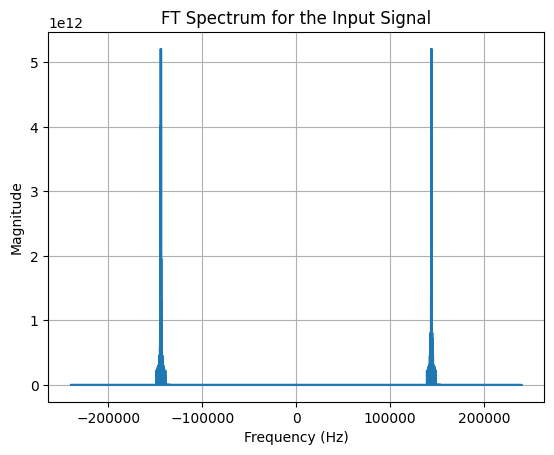

In [6]:
from scipy import signal

filtered_signal_time = ifft(filtered_signal)
filtered_signal_c = filtered_signal_time * carrier_frequency
filtered_signal_c_fft = fft(filtered_signal_c)

freq = np.fft.fftfreq(len(filtered_signal_c_fft), d = 1/sampling_rate)


plt.plot(freq, np.abs(filtered_signal_c_fft))
plt.title('FT Spectrum for the Input Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

We attempt to remove any Noise from the Signal. These noises are any frequency ranges that are outside our FM range.

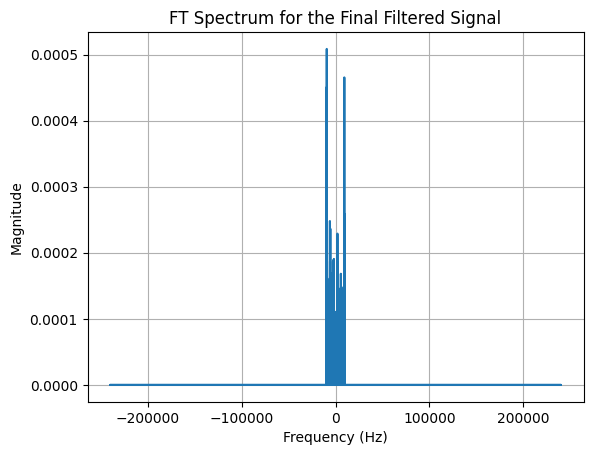

In [7]:
left_side = int(10000*input_length/sampling_rate)
right_side = input_length - left_side
for i in range (left_side, right_side):
    filtered_signal_c_fft[i] = 0

freq = np.fft.fftfreq(len(filtered_signal_c_fft), d = 1/sampling_rate)


plt.plot(freq, np.abs(filtered_signal_c_fft))
plt.title('FT Spectrum for the Final Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

Now we have our sound fourier signal. We will bring this signal to the time domain.

In [14]:
final_signal = ifft(filtered_signal_c_fft)
final_signal = final_signal - np.mean(final_signal)
final_signal = final_signal / max(abs(final_signal))
sound_signal = 2 * np.real(final_signal[0:input_length:20])

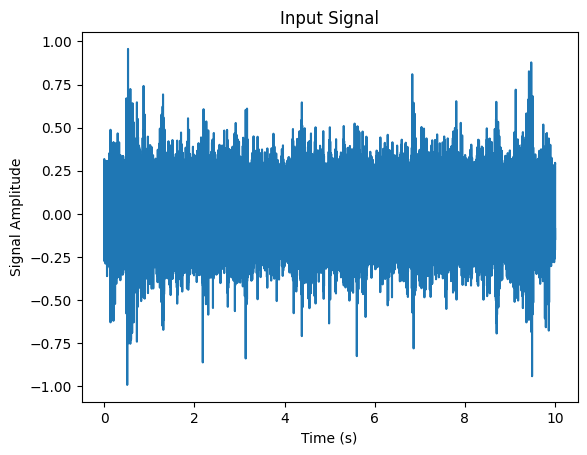

In [15]:
time = [t / sampling_rate for t in range(len(final_signal))]

fig, ax = plt.subplots()
ax.plot(time, final_signal)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal Amplitude')
ax.set_title('Input Signal')

plt.show()

In [18]:
import sounddevice as sd

sd.play(sound_signal, 48000)

sd.wait()

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun o

KeyboardInterrupt: 